<a href="https://colab.research.google.com/github/cielo112/Wemby_vs_Holmgreen_NBA_Debut_Sentiment_Comparison/blob/main/Wembanyama's_vs_Holmgreen's_NBA_Debut_Sentiment_Analysis_and_Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Description

The project aims to extract data from YouTube comments, preprocess the data using RoBERTa transformers, develop a sentiment analysis model, analyze sentiment distribution and trends, and provide an interactive visualization. This comprehensive approach will provide valuable insights into public sentiment regarding Victor Wembanyama's and Chet Holmgreen's NBA debuts, facilitating a comparative analysis of people's sentiments about the two players.

**Objectives:**

* Objective 1: Build an Automated Web Scraping Tool

The first objective of the project is to develop an automated web scraping tool using Selenium. The tool will be specifically designed to extract data from YouTube comments related to Victor Wembanyama's and Chet Holmgreen's NBA debuts. Selenium will be used to interact with the web pages, simulate user actions, and extract the desired data efficiently.

* Objective 2: Preprocess the Collected Data

The second objective focuses on preprocessing the collected YouTube comments data. This step involves removing noise from the comments, handling multilingual text, and tokenizing the text using Huggingface's RoBERTa transformers. The RoBERTa tokenizer will ensure consistent tokenization across different languages, allowing for accurate analysis of the comments.

* Objective 3: Develop a Sentiment Analysis Model

The third objective involves developing a sentiment analysis model using RoBERTa. This is a pretrained model that was developed and trained using text content from Twitter. The model weights are already readily avaible so we can just perform transfer learning. The sentiment analysis model will provide insights into the sentiment expressed in the comments, such as positive, negative, or neutral.

* Objective 4: Analyze Sentiment Distribution and Trends

The fourth objective focuses on analyzing the sentiment distribution and trends within the YouTube comments. This analysis will provide insights into the public opinion surrounding both players' NBA debuts. By examining the sentiment distribution, trends, and patterns, the project aims to identify any significant differences or similarities in the sentiment expressed for Victor Wembanyama and Chet Holmgreen.


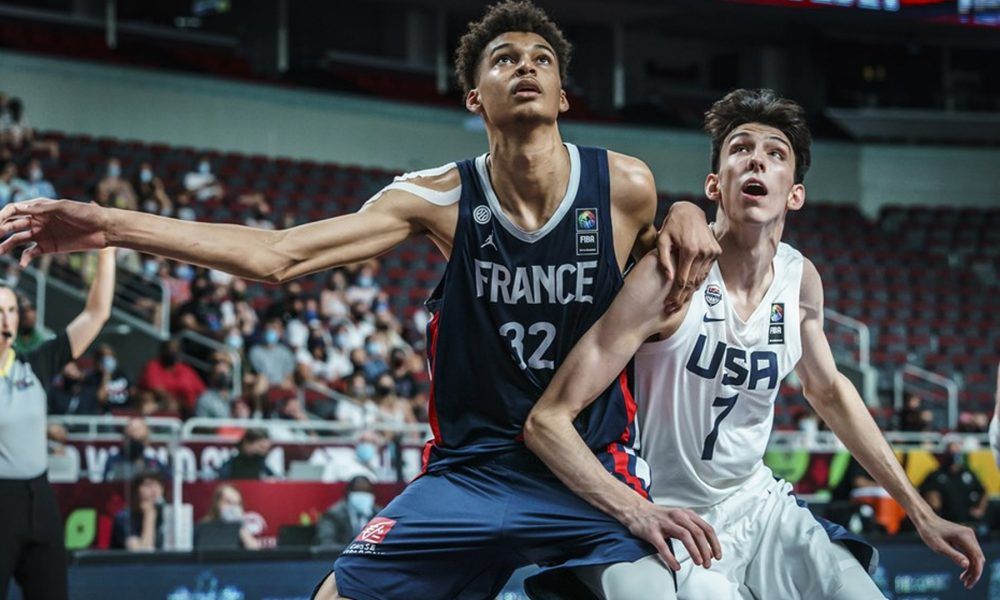

# Automated Web Scraping using Selenium

In this section of the project, we will implement automated web scraping using the Selenium framework. Selenium is a powerful tool that allows us to interact with web pages, simulate user actions, and extract data from websites dynamically.

It is easier to run Selenium and do the webscraping on a local machine that it is using Google Chrome since Selenium will run headless on Google Colab. A headless application is a software program which runs without an inbuilt graphical user interface (GUI) and provides a specific functionality to your application or website. While there are workarounds for this, I find it less convoluted to just run the scraping script locally.

Below are the dependecies and libraries that will be needed for the web scraper.

In [2]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from getpass import getpass
from time import sleep
import csv
import pandas as pd

The first part of this script is a function that extracts data from the website once it is opened and it easily finds the desired elements through XPATH. XPath (XML Path Language) is a query language used to navigate and select elements within an XML document or HTML page. It provides a way to address elements or nodes based on their location and attributes within the document's hierarchical structure.

In [ ]:
def get_comment_data(card):

    try:
        comment = card.find_element(By.XPATH, ('.//div[@id = "comment-content"]')).text
    except NoSuchElementException:
        return

    try:
        num_likes = card.find_element(By.XPATH, ('.//span[@id = "vote-count-middle"]')).text
    except NoSuchElementException:
        return

    comment_data = (comment, num_likes)
    return comment_data

Now that we have the function to gather the data, we are going to create a while loop that continuously extracts data from every comment in the webpage. To ensure that we will be able to connect information, we are also going to automate our browser to scroll down until enough data has been collected. This part can be done using the execute_script() method to execute JavaScript code that scrolls the web page.

For this project let us just collect around 500 comments and nothing more to prevent Youtube from banning us from the site.

In [ ]:
def youtube_comment_scraper(youtube_link, file_name):
  '''Automatically extracts the text content
      and number likes of a Youtube comment'''


  PATH = r"C:\Users\USER\Desktop\Temporary Files\Web Scraping\chromedriver.exe"
  driver = webdriver.Chrome(PATH)

  #Open the youtube link
  driver.get(youtube_link)
  sleep(5)

  data = []
  comment_ids = set()

  comment_section = driver.find_element(By.XPATH, ('//*[@id="comments"]'))
  comment_section.location_once_scrolled_into_view
  sleep(5)

  last_height = driver.execute_script('return document.documentElement.scrollHeight')

  while True:
      cards = driver.find_elements(By.XPATH, ('.//div[@id="body"]'))
      for card in cards[-500:]:
          comment_data = get_comment_data(card)
          if comment_data:
              comment_id = ''.join(comment_data)
              if comment_id not in comment_ids:
                  comment_ids.add(comment_id)
                  data.append(comment_data)

      # check scroll position
      driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
      sleep(2)

      new_height = driver.execute_script('return document.documentElement.scrollHeight')

      if len(comment_ids) > 500:
          break

      if new_height == last_height:
          break

      last_height = new_height

  driver.execute_script('window.scrollTo(0, document.documentElement.scrollHeight);')

  # close the web driver
  driver.close()

  #save the data collected into a csv file
  with open(file_name, 'w', newline='', encoding='utf-8') as f:
      header = ['comment','num_likes']
      writer = csv.writer(f)
      writer.writerow(header)
      writer.writerows(data)

In [ ]:
youtube_links = {'Wembanyama.csv';'https://www.youtube.com/watch?v=x7l6J0zv_ts&t=20s',
                 'Holmgreen.csv';'https://www.youtube.com/watch?v=QU3f0FZNsak&t=68s'}

for player in youtube_links:
  youtube_comment_scraper(youtube_links[player], player)


In [104]:
wemby = pd.read_csv(r'/content/drive/MyDrive/Datasets/wembanyama_youtube_comments.csv')
holm = pd.read_csv(r'/content/drive/MyDrive/Datasets/holmgreen_youtube_comments.csv')

# Initial Look at the Dataset

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Comments on Wembanyama's NBA Debut**

In [106]:
wemby.head()

,comment,num_likes
0,Dude plays defense just by being there. A lot ...,355.0
1,Wemby seemed hurried and jittery on the offens...,70.0
2,He just shot badly tonight but everything else...,768.0
3,"Great defense, great passing, great pace. He h...",136.0
4,"can't judge this is his first game, he's still...",243.0


In [107]:
wemby.tail()

,comment,num_likes
510,Chet is going to eat Victors lunch,NaN
511,Victor Tackoyama,1.0
512,Champagine is himmy,NaN
513,wemBUMyama,NaN
514,gonna be a bust,NaN


In [108]:
wemby.isnull().sum()

comment        2
num_likes    388
dtype: int64

In [109]:
wemby.dropna(subset= ['comment'], axis = 0, inplace=True)

In [110]:
wemby.isnull().sum()

comment        0
num_likes    387
dtype: int64

**Comments on Holmgreen's NBA Debut**

In [111]:
holm.head()

,comment,num_likes
0,The most dangerous play of the game was his Di...,760.0
1,I wish this man a long healthy career man,481.0
2,Super tall blocking shots and shooting 3s like...,313.0
3,This is what a unicorn really looks like. Chet...,630.0
4,"I am hyped about his defensive ability, this g...",8.0


In [112]:
holm.tail()

,comment,num_likes
455,Sam Presti drafted the white Kevin Durant,NaN
456,ja morant just laughs at him that's not deserv...,NaN
457,tos ito ikukumpara kay kai sotto. eh ang lakas...,1.0
458,Wow,NaN
459,What's the difference between him and Bol Bol ...,NaN


In [113]:
holm.isnull().sum()

comment        1
num_likes    330
dtype: int64

In [114]:
holm.dropna(subset= ['comment'], axis = 0, inplace=True)

In [115]:
holm.isnull().sum()

comment        0
num_likes    330
dtype: int64

# Sentiment Analyzer using BERT Neural Network

Hugging Face is a company and an open-source community that has made significant contributions to the NLP field. They have developed the "Transformers" library, which provides a high-level API and pre-trained models for various transformer architectures, including BERT. The library facilitates easy implementation and fine-tuning of transformer models for downstream NLP tasks.


BERT (Bidirectional Encoder Representations from Transformers) is a popular transformer-based model developed by Google AI's research team. It has achieved state-of-the-art performance on a wide range of natural language processing (NLP) tasks, including text classification, named entity recognition, question answering, and more.



In [116]:
 !pip install --no-cache-dir transformers sentencepiece

In [117]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

For this project we will be using a pre-trained sentiment analysis model based on the XLM-RoBERTa architecture specifically trained for sentiment analysis on Twitter data. XLM-RoBERTa is a variant of the RoBERTa (Robustly Optimized BERT Pretraining Approach) model, which is itself based on the Transformer architecture.

The Cardiff NLP Research Group developed this sentiment analysis model using the XLM-RoBERTa architecture and trained it on a large corpus of Twitter data. The goal of the model is to classify the sentiment expressed in a given text into one of several predefined categories, such as positive, negative, or neutral.

In [118]:
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=False)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [119]:
def roberta_polarity_scores(text):
  ''' This function retrieves the negative, netural and positive scores given by
      the RoBERTa model to the text that is fed into it'''

  encoded = tokenizer(text, return_tensors='pt')
  output = model(**encoded)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'negative' : scores[0],
      'neutral' : scores[1],
      'positive' : scores[2]
  }
  return scores_dict

# Sentiment Analysis

In [120]:
from tqdm.notebook import tqdm

In [125]:
def sentiment_analyzer(df):
  '''This function applyes the roberta_polarity_scores and concatenates the
      result to the original dataframe to create a new one with
      the sentiment scores.'''

  tqdm.pandas()
  scores_dict = tqdm(df['comment'].progress_apply(roberta_polarity_scores), total=len(df))
  roberta_scores = pd.DataFrame(scores_dict)

  df = pd.concat([df, roberta_scores], axis=1)
  df = df.reset_index(drop=True)

  return df

In [126]:
wemby = sentiment_analyzer(wemby)
wemby.head()

  0%|          | 0/513 [00:00<?, ?it/s]

  0%|          | 0/513 [00:00<?, ?it/s]

,comment,num_likes,negative,neutral,positive
0,Dude plays defense just by being there. A lot ...,355.0,0.734152,0.179754,0.086093
1,Wemby seemed hurried and jittery on the offens...,70.0,0.056748,0.110691,0.832560
2,He just shot badly tonight but everything else...,768.0,0.035589,0.100173,0.864237
3,"Great defense, great passing, great pace. He h...",136.0,0.274333,0.187717,0.537950
4,"can't judge this is his first game, he's still...",243.0,0.070834,0.524689,0.404477


In [127]:
holm = sentiment_analyzer(holm)
holm.head()

  0%|          | 0/459 [00:00<?, ?it/s]

  0%|          | 0/459 [00:00<?, ?it/s]

,comment,num_likes,negative,neutral,positive
0,The most dangerous play of the game was his Di...,760.0,0.842983,0.083779,0.073238
1,I wish this man a long healthy career man,481.0,0.060773,0.123465,0.815762
2,Super tall blocking shots and shooting 3s like...,313.0,0.020708,0.068447,0.910845
3,This is what a unicorn really looks like. Chet...,630.0,0.079539,0.103256,0.817205
4,"I am hyped about his defensive ability, this g...",8.0,0.072061,0.071899,0.856040


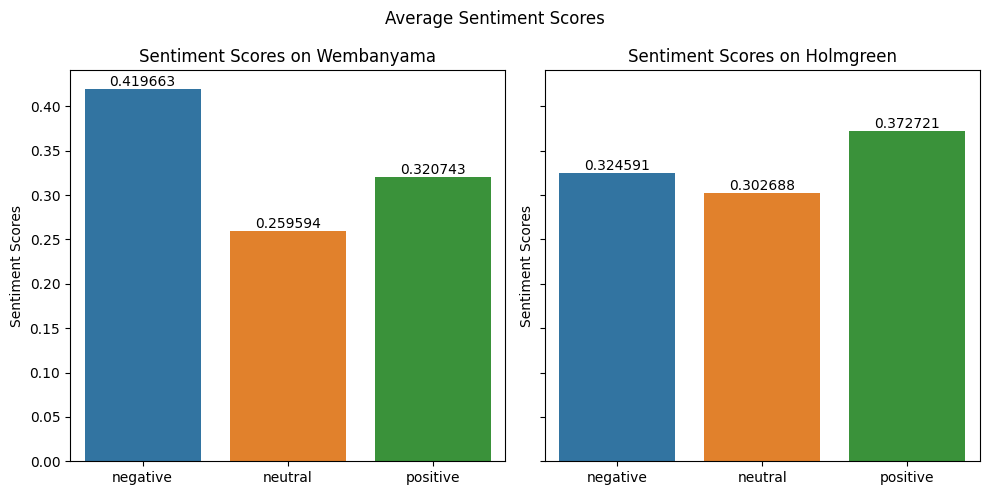

In [157]:
fig, axs = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharey= True)
for i, df, name in zip(range(1,3), [wemby, holm], ['Wembanyama', 'Holmgreen']):
  plt.subplot(1,2,i)
  sns.barplot(x=['negative', 'neutral', 'positive'], y=[df['negative'].mean(),
              df['neutral'].mean(), df['positive'].mean()])
  plt.ylabel('Sentiment Scores')
  plt.title('Sentiment Scores on ' + name)
  for bars in axs[i-1].containers:
    axs[i-1].bar_label(bars)
plt.suptitle('Average Sentiment Scores')
fig.tight_layout()
plt.show()

In [130]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [170]:
def pos_neg(df):
  '''creates two df, one with the negative comments and the other with the very
      positive comments'''

  positive_comments = df[df['positive']> 0.8]
  negative_comments = df[df['negative']> 0.8]

  return positive_comments, negative_comments

def pos_word_cloud(positive_comments, name):
  '''creates a word cloud for the positive comment that shows the words used
      the most'''

  positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = STOPWORDS).generate(str(positive_comments))
  plt.figure()
  plt.title("Positive Comments on " + name)
  plt.imshow(positive_wordcloud, interpolation="bilinear")
  plt.axis("off")

  return plt.show()


def neg_word_cloud(negative_comments, name):
  '''creates a word cloud for the negative comment that shows the words used
      the most'''

  negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = STOPWORDS).generate(str(negative_comments))
  plt.figure()
  plt.title("Negative Comments on " + name)
  plt.imshow(negative_wordcloud, interpolation="bilinear")
  plt.axis("off")

  return plt.show()

In [149]:
wemby = wemby.dropna(subset=['comment', 'positive', 'negative', 'neutral'], axis =0)
holm = holm.dropna(subset=['comment', 'positive', 'negative', 'neutral'], axis =0)

In [159]:
dfs = [wemby, holm]

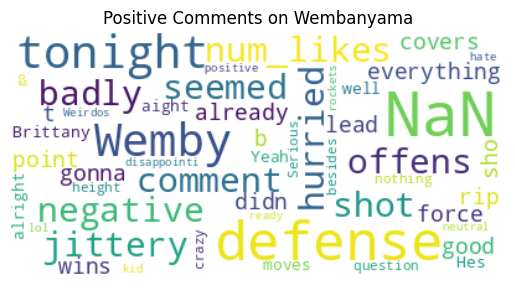

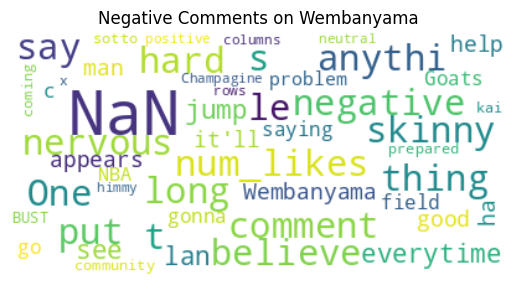

In [171]:
positive_comments, negative_comments = pos_neg(wemby)
pos_word_cloud(positive_comments, 'Wembanyama')
neg_word_cloud(negative_comments, 'Wembanyama')

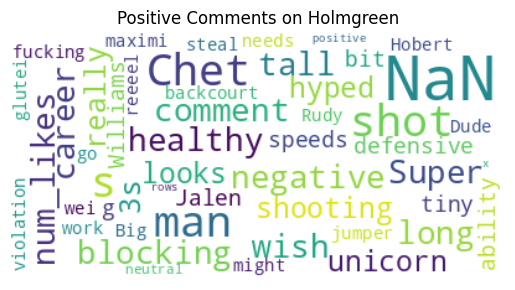

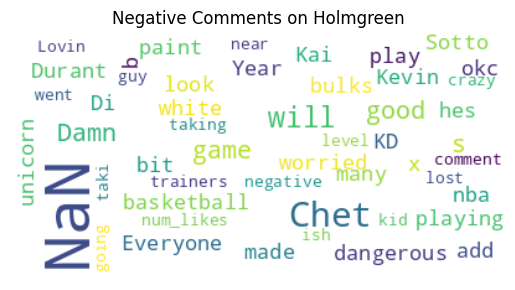

In [172]:
positive_comments, negative_comments = pos_neg(holm)
pos_word_cloud(positive_comments, 'Holmgreen')
neg_word_cloud(negative_comments, 'Holmgreen')

# Conclusion



This project aimed to conduct sentiment analysis on web-scraped data to compare the sentiments of people regarding the NBA debuts of Victor Wembanyama and Chet Holgreens. After analyzing the collected data, it was evident that the sentiment surrounding Victor Wembanyama's NBA debut was predominantly negative.

The sentiment analysis involved scraping text information from both Wembanyama and Holmgreen's NBA Debut posted by NBA themselves. Through natural language processing techniques and sentiment classification algorithms provided by Huggingface, the collected data was processed and categorized into positive, neutral, and negative sentiments.

The findings revealed that a significant portion of the sentiments expressed towards Victor Wembanyama's NBA debut were negative. It is important to note that sentiment analysis is subjective and influenced by various factors such as personal biases, online discourse, and specific circumstances surrounding the event. Therefore, these findings should be interpreted within the limitations of the analysis.